# Test case vizualizer

Demonstrates how to process .csv test file and how to vizualize it

In [136]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Test problem plotter

In [137]:
def plot_problem(problems, name):
    sym_objective  = sym.sympify(problems.loc[name,'objective'])
    x = sym.symbols('x')
    f = sym.lambdify(x, sym_objective)
    a = problems.loc[name,'a']
    b = problems.loc[name,'b']
    min_x = problems.loc[name,'min_x']
    min_f = problems.loc[name,'min_f']
    
    step = (b-a)/1000.
    ta = np.arange(a, b + step, step)
    ln = len(ta)
    fta = np.arange(ln).astype(float)
    for i in range(ln):
        fta[i] = f(ta[i])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    plt.plot(ta, fta, 'r-')
    plt.scatter(min_x, min_f, s=20)
    plt.ylim([lb - d,ub + d])
    plt.show() 

Set .csv file name with test cases below

In [138]:
fname = '/tmp/shek.csv'

In [139]:
problems = pd.read_csv(fname, index_col = 'name', comment = '#')

In [140]:
print(problems)

                                                   objective    a    b  \
name                                                                     
rshekel_0  1./(1.46298 * (10. * x - 0.20656)^2 + 0.22513)...  0.0  1.0   
rshekel_1  1./(5.803 * (10. * x - 0.01463)^2 + 0.16145) +...  0.0  1.0   
rshekel_2  1./(1.58621 * (10. * x - 5.11328)^2 + 0.28451)...  0.0  1.0   
rshekel_3  1./(1.93098 * (10. * x - 2.51767)^2 + 0.16998)...  0.0  1.0   
rshekel_4  1./(4.55238 * (10. * x - 1.68016)^2 + 0.27432)...  0.0  1.0   
rshekel_5  1./(5.75608 * (10. * x - 5.69979)^2 + 0.28341)...  0.0  1.0   
rshekel_6  1./(2.1305 * (10. * x - 9.28006)^2 + 0.26996) ...  0.0  1.0   
rshekel_7  1./(3.13072 * (10. * x - 6.11359)^2 + 0.24215)...  0.0  1.0   
rshekel_8  1./(5.78176 * (10. * x - 7.93745)^2 + 0.16345)...  0.0  1.0   
rshekel_9  1./(6.61235 * (10. * x - 4.30185)^2 + 0.18309)...  0.0  1.0   

             min_f    min_x  
name                         
rshekel_0  0.32913  0.23122  
rshekel_1  0.50644  0

rshekel_0


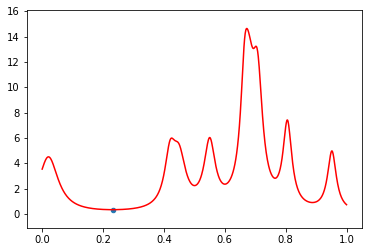

rshekel_1


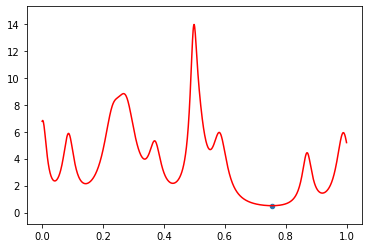

rshekel_2


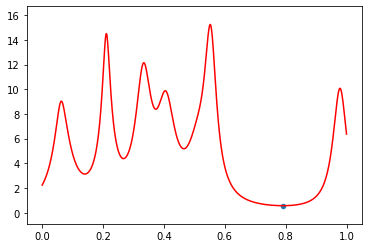

rshekel_3


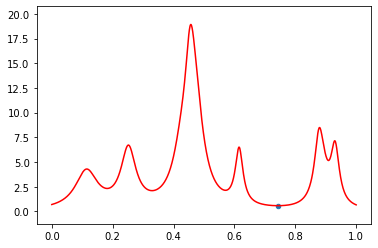

rshekel_4


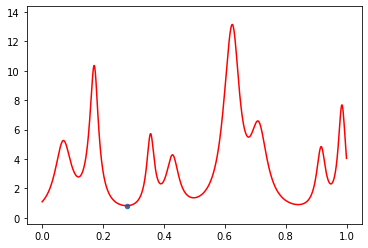

rshekel_5


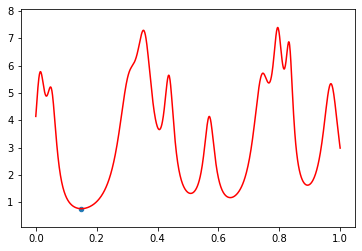

rshekel_6


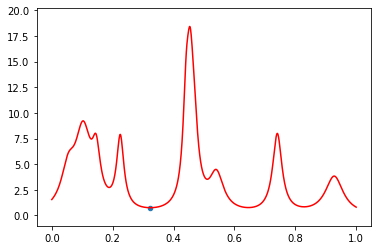

rshekel_7


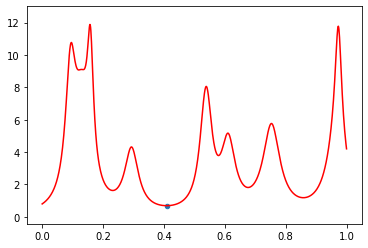

rshekel_8


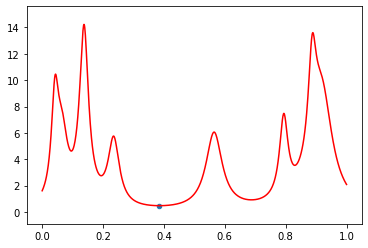

rshekel_9


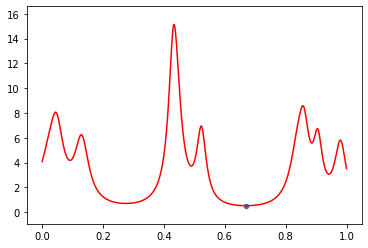

In [141]:
ind = problems.index
for i in ind:
    print(i)
    plot_problem(problems, i)